In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\zuz12\OneDrive\Desktop\personality_prediction\personality_dataset.csv")


In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [7]:
missing_percent = df.isnull().mean() * 100

In [8]:
missing_percent

Time_spent_Alone             2.172414
Stage_fear                   2.517241
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.793103
Friends_circle_size          2.655172
Post_frequency               2.241379
Personality                  0.000000
dtype: float64

In [9]:
overall_missing_percent = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
overall_missing_percent

np.float64(1.9741379310344827)

In [10]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [11]:
# avg time that personality spend alone 
q1=df.groupby(["Personality","Stage_fear"]).aggregate({"Time_spent_Alone":"mean"})
q1


Time_spent_Alone
Personality Stage_fear                  
Extrovert   No                  1.552833
            Yes                 8.427273
Introvert   No                  1.205128
            Yes                 7.435978

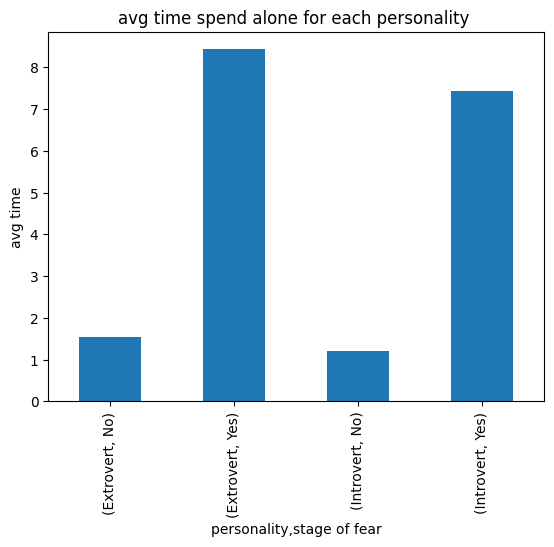

In [12]:
q1.plot(kind="bar",legend=False)
plt.title("avg time spend alone for each personality ")
plt.xlabel("personality,stage of fear")
plt.ylabel("avg time")
plt.show()

In [13]:
# avg of Social_event_attendance for stage fear
q2=df.groupby("Stage_fear").aggregate({"Social_event_attendance":"mean"})

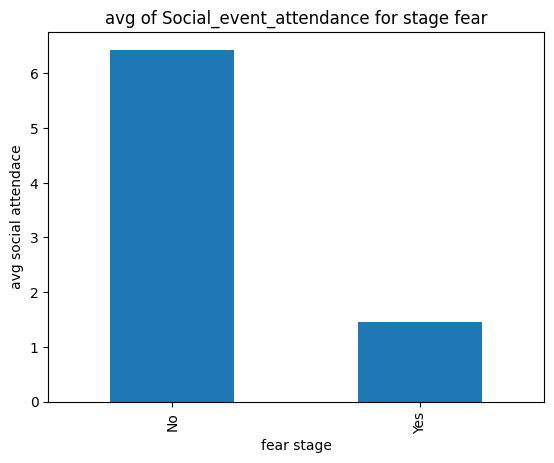

In [14]:
q2.plot(kind="bar",legend=False)
plt.title("avg of Social_event_attendance for stage fear")
plt.xlabel("fear stage")
plt.ylabel("avg social attendace")
plt.show()

In [15]:
num_col=df.select_dtypes(include=["int","float"]).columns
num_col

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

In [16]:
obj_col=df.select_dtypes("object").columns
num_col=df.select_dtypes(include=["int","float"]).columns


# eda 2

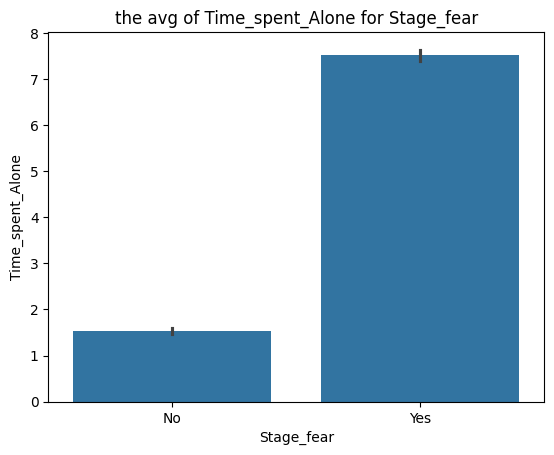

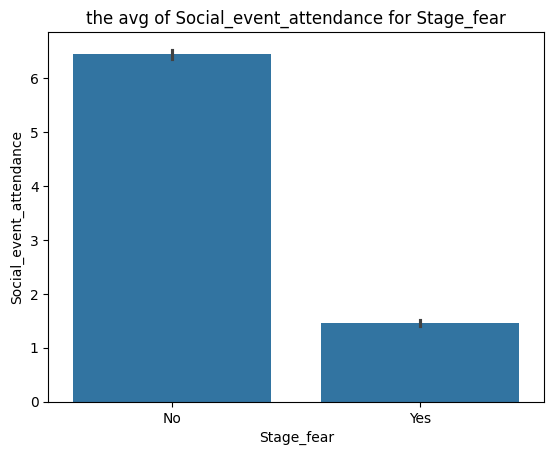

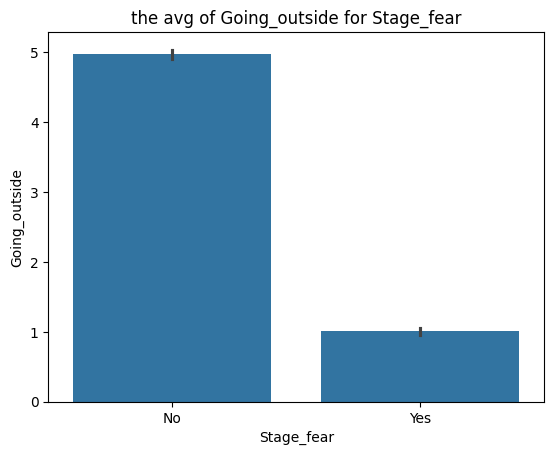

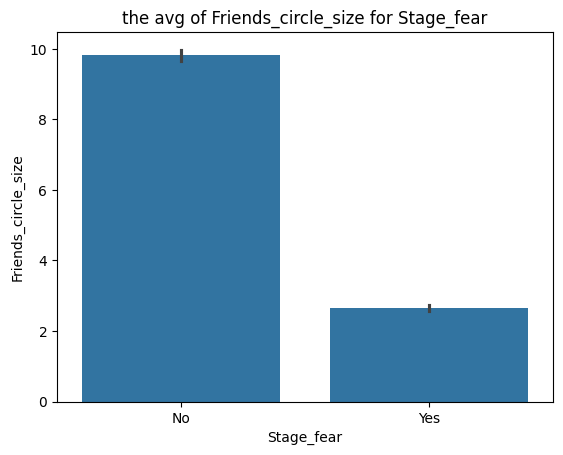

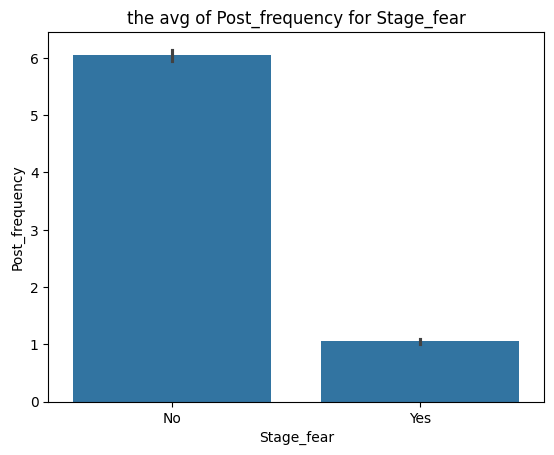

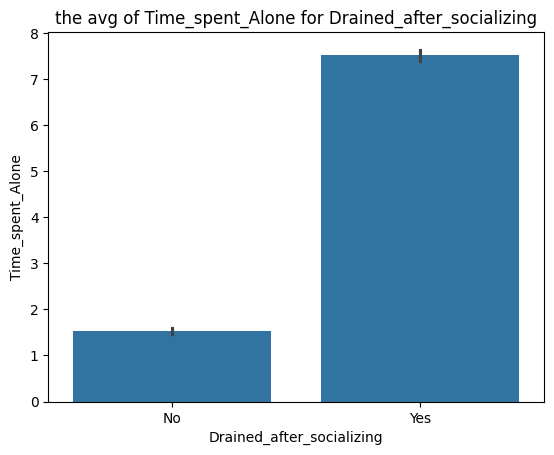

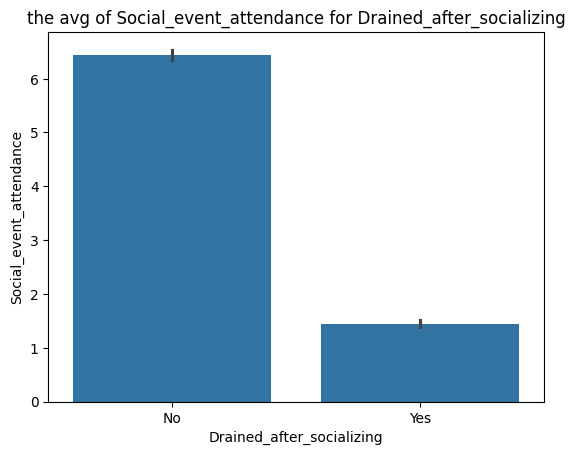

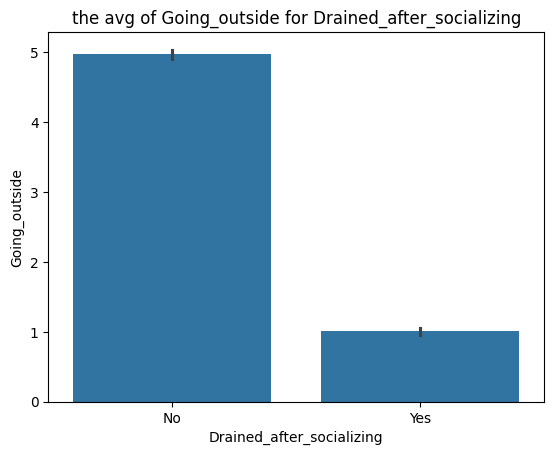

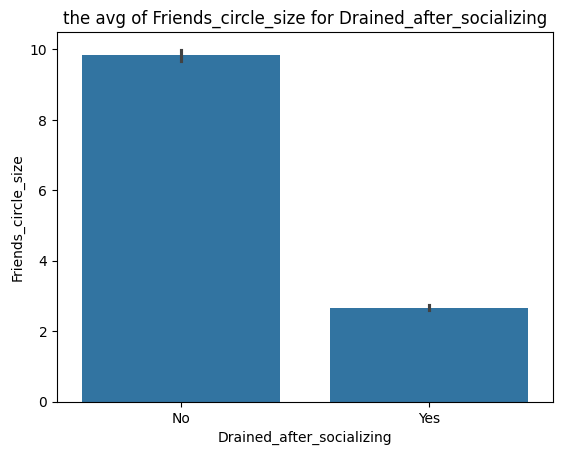

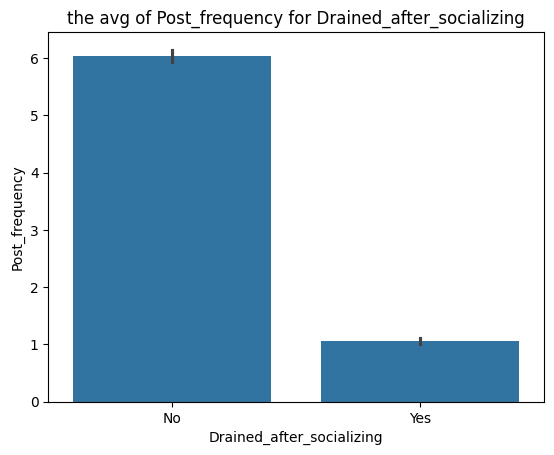

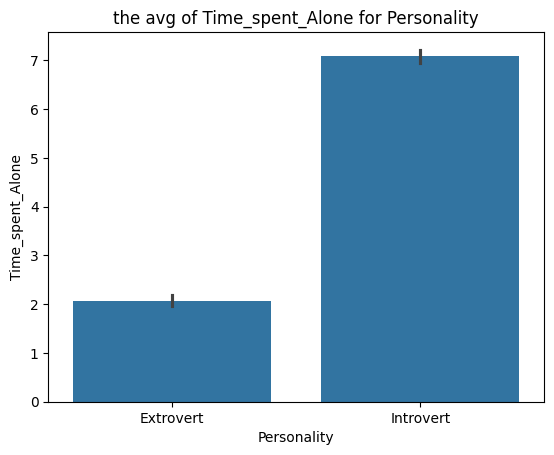

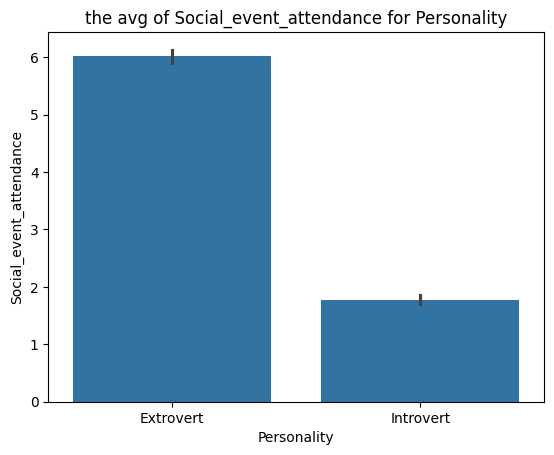

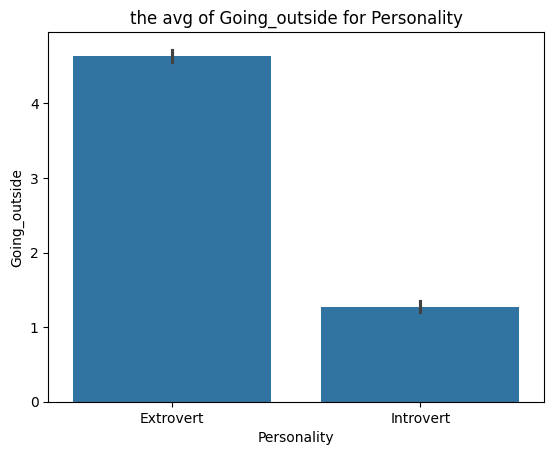

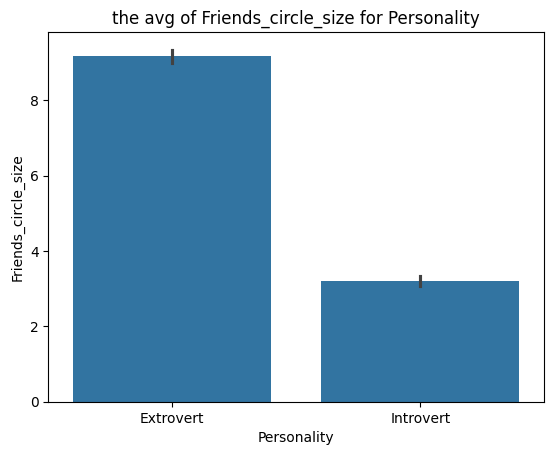

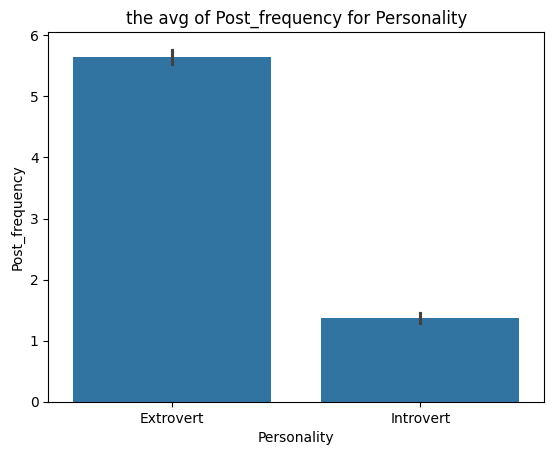

In [17]:
obj_col=df.select_dtypes("object").columns
num_col=df.select_dtypes(include=["int","float"]).columns
for obj in obj_col:
    for num in num_col:
        sns.barplot(x=df[obj],y=df[num],data=df,estimator=np.mean)
        plt.title(f"the avg of {num} for {obj}")
        plt.xlabel(f"{obj}")
        plt.ylabel(f"{num}")
        plt.show()
        

In [18]:
df["Personality"].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

# check distribution

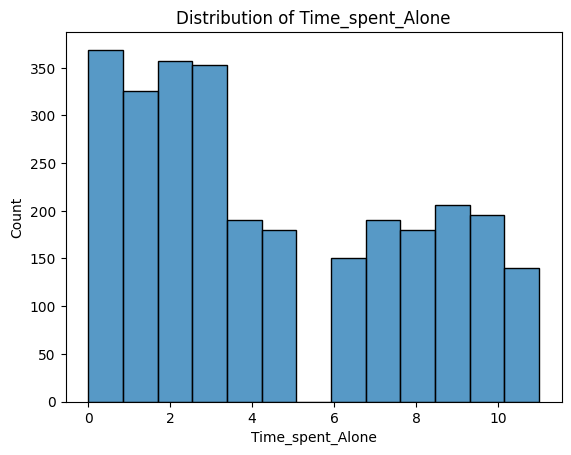

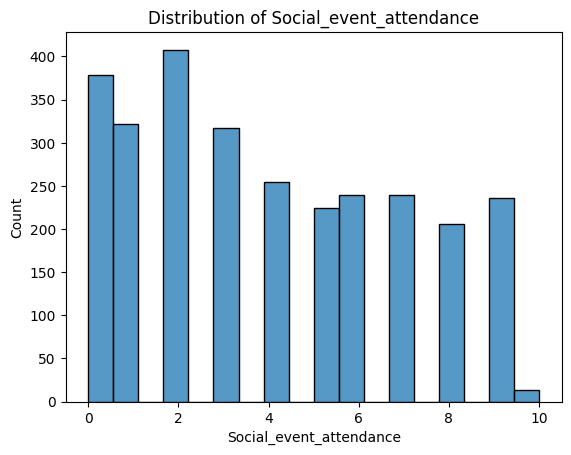

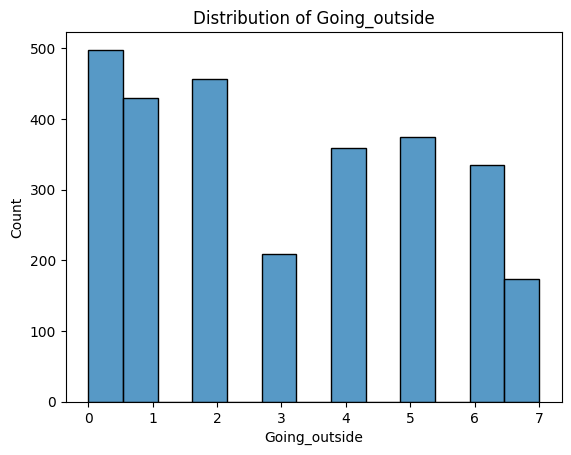

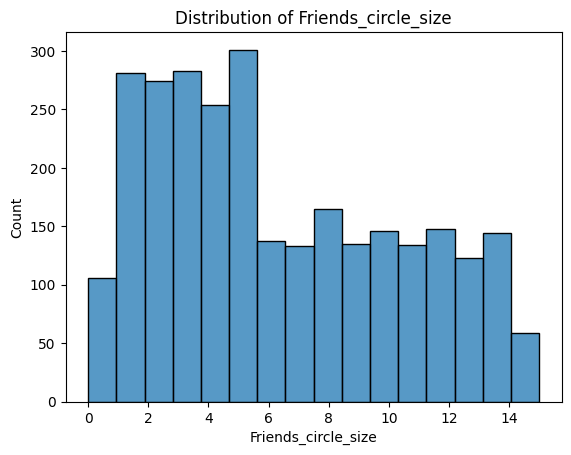

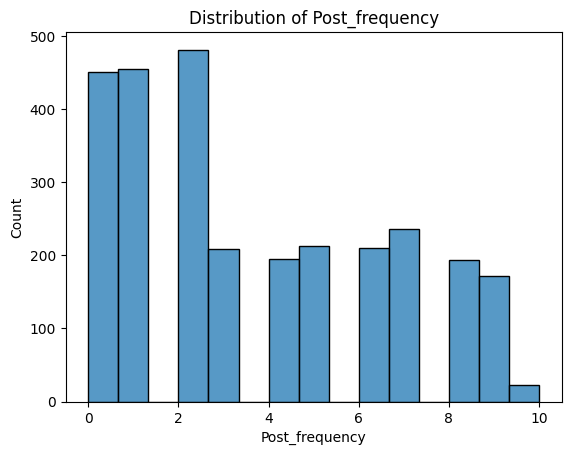

In [19]:

for col in num_col:
    sns.histplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.show()

# check outliers

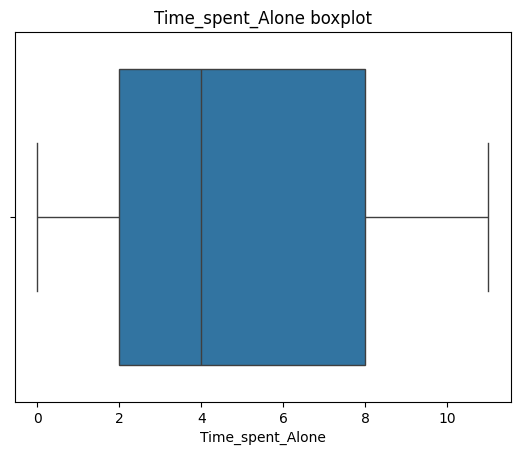

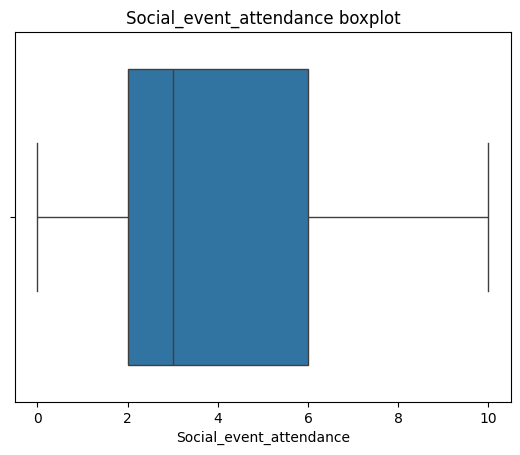

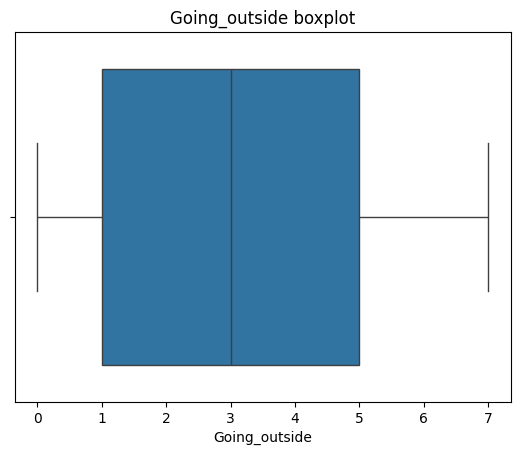

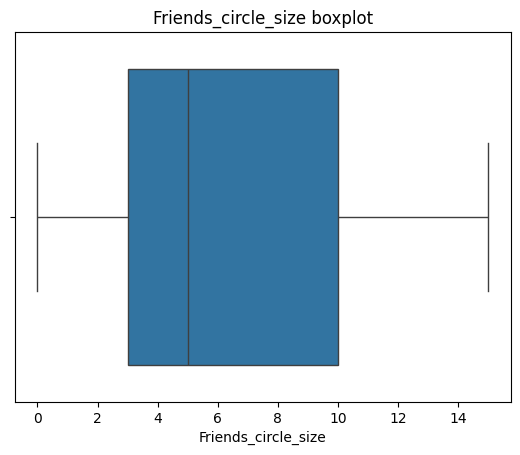

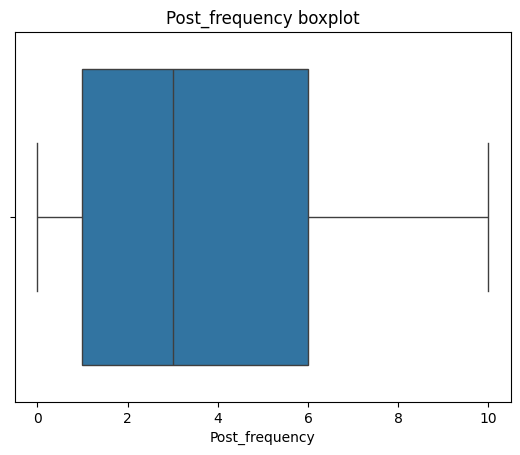

In [20]:
# i dont have any outliers
for col in num_col:
    sns.boxplot(x=df[col])
    plt.title(f"{col} boxplot")
    plt.show()

In [21]:
df=df.dropna(axis=0)

# spliting

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=df.drop("Personality",axis=1)
y=df["Personality"]

# correlation analysis


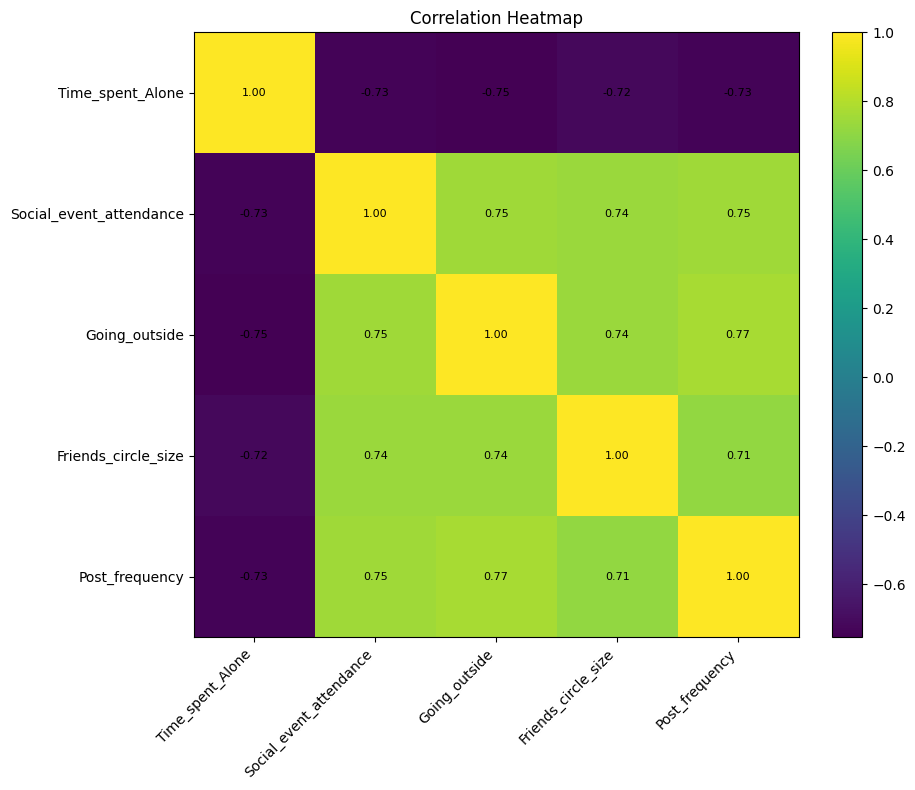

In [24]:
num_df = x.select_dtypes(include=[np.number])
corr = num_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(corr.values)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.columns)
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.values[i, j]:.2f}", va="center", ha="center", fontsize=8)
ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [25]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.10,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_temp,y_temp,test_size=0.50,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
x_train[num_col] = scaler.fit_transform(x_train[num_col])
x_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 1176 to 951
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2229 non-null   float64
 1   Stage_fear                 2229 non-null   object 
 2   Social_event_attendance    2229 non-null   float64
 3   Going_outside              2229 non-null   float64
 4   Drained_after_socializing  2229 non-null   object 
 5   Friends_circle_size        2229 non-null   float64
 6   Post_frequency             2229 non-null   float64
dtypes: float64(5), object(2)
memory usage: 139.3+ KB


In [29]:
x_test[num_col]=scaler.transform(x_test[num_col])
x_test

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
1191,1.005098,Yes,-0.330591,-0.899798,Yes,-0.763649,-1.220154
489,1.866223,Yes,-0.330591,-0.899798,Yes,-0.300724,-0.535171
2684,0.143972,Yes,-0.330591,-0.899798,Yes,-0.763649,-0.877663
2459,-0.430112,No,0.015041,0.868073,No,-0.300724,0.149811
552,1.005098,Yes,-0.676222,-1.341766,Yes,-0.763649,-0.535171
...,...,...,...,...,...,...,...
666,-0.430112,No,0.015041,0.868073,No,1.088049,0.149811
1113,-0.143070,Yes,-1.021854,-0.457830,Yes,-0.995111,-0.535171
685,-1.291238,No,1.743199,0.426105,No,0.856587,0.492302
523,-0.143070,Yes,-1.367485,-1.341766,Yes,-1.458036,-0.877663


In [30]:
x_val[num_col]=scaler.transform(x_val[num_col])
x_val

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
46,-0.143070,No,1.051936,0.426105,No,1.550973,2.204758
2411,-0.430112,No,1.743199,1.310041,No,1.550973,1.519776
2272,-1.291238,No,1.743199,0.868073,No,-0.069262,1.177285
580,-0.430112,No,1.397567,0.426105,No,0.162200,0.492302
1391,1.579181,Yes,-0.676222,-1.341766,Yes,-0.300724,-0.535171
...,...,...,...,...,...,...,...
1356,0.718056,Yes,-1.367485,-1.341766,Yes,-1.226573,-0.535171
2696,1.579181,Yes,-1.021854,-0.899798,Yes,-1.226573,-0.535171
2552,-0.430112,No,0.360673,1.310041,No,0.393662,1.519776
481,1.866223,Yes,-0.676222,-0.899798,Yes,-1.458036,-0.877663


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
cat=x_train.select_dtypes(include="object").columns

In [33]:
le=LabelEncoder()

In [34]:
x_train["Drained_after_socializing"]=le.fit_transform(x_train["Drained_after_socializing"])
x_train["Stage_fear"]=le.fit_transform(x_train["Stage_fear"])

In [35]:
x_train.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
1176,-0.430112,0,1.051936,1.310041,0,1.782436,1.862267
1311,-0.430112,0,1.051936,1.310041,0,-0.069262,0.492302
1435,0.718056,1,-0.676222,-0.899798,1,-1.226573,-1.220154
684,-0.143070,1,-0.676222,-0.457830,1,-0.995111,-0.535171
2467,1.579181,1,-1.367485,-0.457830,1,-1.226573,-1.220154


In [36]:
x_val["Drained_after_socializing"]=le.transform(x_val["Drained_after_socializing"])
x_val["Stage_fear"]=le.transform(x_val["Stage_fear"])
x_val

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
46,-0.143070,0,1.051936,0.426105,0,1.550973,2.204758
2411,-0.430112,0,1.743199,1.310041,0,1.550973,1.519776
2272,-1.291238,0,1.743199,0.868073,0,-0.069262,1.177285
580,-0.430112,0,1.397567,0.426105,0,0.162200,0.492302
1391,1.579181,1,-0.676222,-1.341766,1,-0.300724,-0.535171
...,...,...,...,...,...,...,...
1356,0.718056,1,-1.367485,-1.341766,1,-1.226573,-0.535171
2696,1.579181,1,-1.021854,-0.899798,1,-1.226573,-0.535171
2552,-0.430112,0,0.360673,1.310041,0,0.393662,1.519776
481,1.866223,1,-0.676222,-0.899798,1,-1.458036,-0.877663


In [37]:
x_test["Drained_after_socializing"]=le.transform(x_test["Drained_after_socializing"])
x_test["Stage_fear"]=le.transform(x_test["Stage_fear"])
x_test

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
1191,1.005098,1,-0.330591,-0.899798,1,-0.763649,-1.220154
489,1.866223,1,-0.330591,-0.899798,1,-0.300724,-0.535171
2684,0.143972,1,-0.330591,-0.899798,1,-0.763649,-0.877663
2459,-0.430112,0,0.015041,0.868073,0,-0.300724,0.149811
552,1.005098,1,-0.676222,-1.341766,1,-0.763649,-0.535171
...,...,...,...,...,...,...,...
666,-0.430112,0,0.015041,0.868073,0,1.088049,0.149811
1113,-0.143070,1,-1.021854,-0.457830,1,-0.995111,-0.535171
685,-1.291238,0,1.743199,0.426105,0,0.856587,0.492302
523,-0.143070,1,-1.367485,-1.341766,1,-1.458036,-0.877663


In [38]:
y_train = pd.DataFrame(
    le.fit_transform(y_train),
    columns=["Personality"],
    index=y_train.index
)
y_train

,Personality
1176,0
1311,0
1435,0
684,1
2467,1
...,...
1863,0
1201,1
1238,1
1415,1


In [39]:
y_test = pd.DataFrame(
    le.transform(y_test),
    columns=["Personality"],
    index=y_test.index
)

In [40]:

y_test

,Personality
1191,1
489,1
2684,1
2459,0
552,1
...,...
666,0
1113,1
685,0
523,1


In [41]:
y_val = pd.DataFrame(
    le.transform(y_val),
    columns=["Personality"],
    index=y_val.index
)

In [42]:
y_val

,Personality
46,0
2411,0
2272,0
580,0
1391,1
...,...
1356,1
2696,1
2552,0
481,1


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.ensemble import VotingClassifier


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve, roc_auc_score

In [67]:
def plot_roc_auc(model, X_test, y_test, model_name="Model"):
   
    
    if hasattr(model, "predict_proba"):
        scores = model.predict_proba(X_test)

    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_test)
        if scores.ndim == 1:
            scores = np.vstack([-scores, scores]).T
    else:
        raise ValueError("Model does not support predict_proba or decision_function")

    n_classes = scores.shape[1]

    if n_classes == 2:
        y_score = scores[:, 1]
        auc = roc_auc_score(y_test, y_score)
        fpr, tpr, _ = roc_curve(y_test, y_score)

        plt.figure(figsize=(6,6))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.3f})")
        plt.plot([0,1], [0,1], "--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (Recall)")
        plt.title(f"ROC Curve — {model_name}")
        plt.legend()
        plt.show()

        print(f"{model_name} ROC AUC: {auc:.4f}")

    else:
        # Multi-class OvR
        auc_macro = roc_auc_score(y_test, scores, multi_class="ovr", average="macro")
        print(f"{model_name} Macro ROC AUC (OvR): {auc_macro:.4f}")

        plt.figure(figsize=(7,7))
        colors = plt.cm.tab10.colors
        for i in range(n_classes):
            y_true_bin = (y_test == i).astype(int)
            y_score = scores[:, i]
            fpr, tpr, _ = roc_curve(y_true_bin, y_score)
            auc_i = roc_auc_score(y_true_bin, y_score)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC={auc_i:.3f})", color=colors[i % len(colors)])

        plt.plot([0,1], [0,1], "--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (Recall)")
        plt.title(f"ROC Curves — {model_name}")
        plt.legend()
        plt.show()

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Logistic Regression ===
Accuracy : 0.9193548387096774
Precision: 0.9197916666666667
Recall   : 0.9193548387096774
F1 Score : 0.9193338537600833
[[56  6]
 [ 4 58]]


In [48]:
scores = cross_val_score(logreg, x_train, y_train, cv=cv, scoring="accuracy")
print("log reg Accuracy:", scores.mean(), "±", scores.std())

log reg Accuracy: 0.9246294150249408 ± 0.009039283966164638


c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

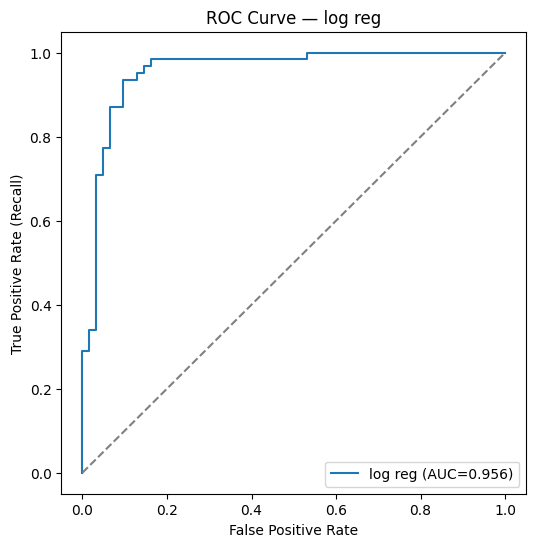

log reg ROC AUC: 0.9560


In [68]:
plot_roc_auc(logreg, x_test, y_test, model_name="log reg")

####################

In [49]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [50]:
print("=== dt  ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== dt  ===
Accuracy : 0.8629032258064516
Precision: 0.8629976580796253
Recall   : 0.8629032258064516
F1 Score : 0.8628943089430894
[[54  8]
 [ 9 53]]


In [51]:

scores = cross_val_score(dt, x_train, y_train, cv=cv, scoring="accuracy")
print("Decision Tree Accuracy:", scores.mean(), "±", scores.std())

Decision Tree Accuracy: 0.8470156698745402 ± 0.015633039629992122


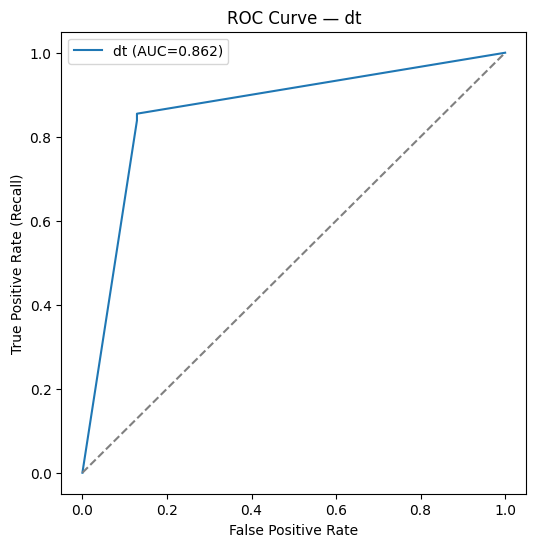

dt ROC AUC: 0.8619


In [69]:
plot_roc_auc(dt, x_test, y_test, model_name="dt")

###################

In [52]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [53]:
print("=== rf  ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== rf  ===
Accuracy : 0.8870967741935484
Precision: 0.8875
Recall   : 0.8870967741935484
F1 Score : 0.8870673952641166
[[54  8]
 [ 6 56]]


In [54]:
scores = cross_val_score(rf, x_train, y_train, cv=cv, scoring="accuracy")
print("Random Forest Accuracy:", scores.mean(), "±", scores.std())

c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConvers

Random Forest Accuracy: 0.9071335718244571 ± 0.011394595150562523


c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


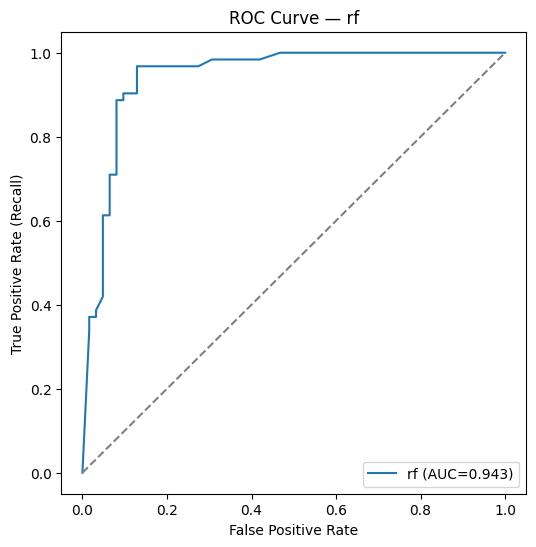

rf ROC AUC: 0.9433


In [70]:
plot_roc_auc(rf, x_test, y_test, model_name="rf")

##################

In [55]:
svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
print("=== SVM (RBF) ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
cm

=== SVM (RBF) ===
Accuracy : 0.9193548387096774
Precision: 0.9197916666666667
Recall   : 0.9193548387096774
F1 Score : 0.9193338537600833


array([[56,  6],
       [ 4, 58]])

In [57]:
scores = cross_val_score(svm, x_train, y_train, cv=cv, scoring="accuracy")
print("SVM (RBF) Accuracy:", scores.mean(), "±", scores.std())

c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

SVM (RBF) Accuracy: 0.9246294150249408 ± 0.009039283966164638


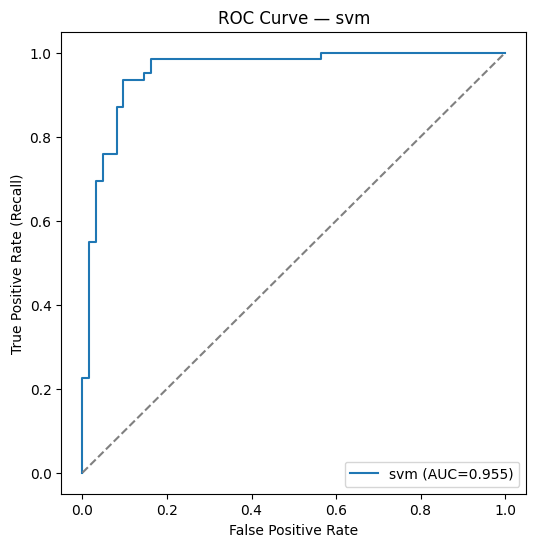

svm ROC AUC: 0.9550


In [71]:
plot_roc_auc(svm, x_test, y_test, model_name="svm")

##########################

In [58]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:50:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
print("=== XGBoost ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))

cm = confusion_matrix(y_test, y_pred)
cm

=== XGBoost ===
Accuracy : 0.9032258064516129
Precision: 0.9036458333333333
Recall   : 0.9032258064516129
F1 Score : 0.9032006245120999


array([[55,  7],
       [ 5, 57]])

In [60]:

scores = cross_val_score(xgb_model, x_train, y_train, cv=cv, scoring="accuracy")
print("XGBoost Accuracy:", scores.mean(), "±", scores.std())


c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:50:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:50:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:50:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:50:10] WARNING: C:\actio

XGBoost Accuracy: 0.9030966896760215 ± 0.013096190086230372


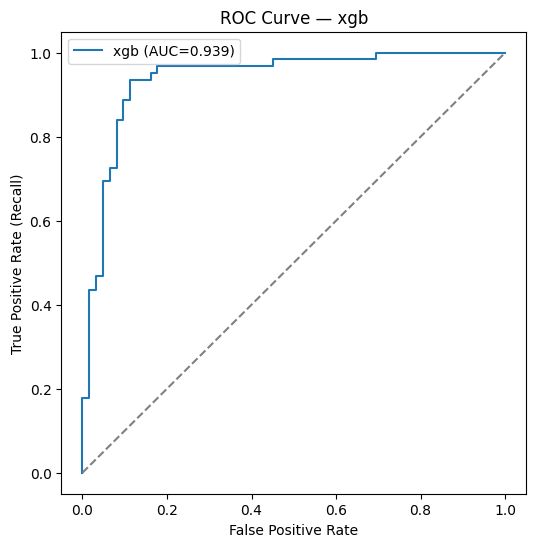

xgb ROC AUC: 0.9386


In [72]:
plot_roc_auc(xgb_model, x_test, y_test, model_name="xgb")

####################

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("=== KNN ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="macro"))
print("Recall   :", recall_score(y_test, y_pred, average="macro"))
print("F1 Score :", f1_score(y_test, y_pred, average="macro"))

cm = confusion_matrix(y_test, y_pred)
cm

=== KNN ===
Accuracy : 0.9032258064516129
Precision: 0.9036458333333333
Recall   : 0.9032258064516129
F1 Score : 0.9032006245120999


c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([[55,  7],
       [ 5, 57]])

In [62]:
scores = cross_val_score(knn, x_train, y_train, cv=cv, scoring="accuracy")
print("Knn Accuracy:", scores.mean(), "±", scores.std())

Knn Accuracy: 0.9196956718899582 ± 0.014204672269534676


c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\zuz12\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:239: 

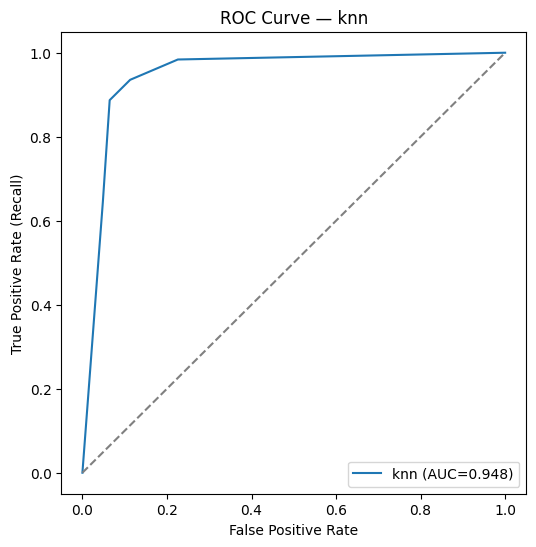

knn ROC AUC: 0.9484


In [73]:
plot_roc_auc(knn, x_test, y_test, model_name="knn")

##########